<a href="https://colab.research.google.com/github/Hifjur/Twitter-Sentiment-Analysis/blob/main/Twitter_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset from 
https://www.kaggle.com/cosmos98/twitter-and-reddit-sentimental-analysis-dataset
using the twitter dataset only

In [2]:
#importing the libraries
import tweepy
import pandas as pd
import numpy as np
import gensim
import os
import nltk
nltk.download('punkt')
import matplotlib.pyplot as plt
import csv
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [3]:
#loading data
df = pd.read_csv('https://raw.githubusercontent.com/Hifjur/Twitter-Sentiment-Analysis/main/Twitter_Data.csv')


In [ ]:
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [4]:
df.clean_text.str.replace('[^a-zA-Z]', ' ')

0         when modi promised  minimum government maximum...
1         talk all the nonsense and continue all the dra...
2         what did just say vote for modi  welcome bjp t...
3         asking his supporters prefix chowkidar their n...
4         answer who among these the most powerful world...
                                ...                        
162975    why these     crores paid neerav modi not reco...
162976    dear rss terrorist payal gawar what about modi...
162977    did you cover her interaction forum where she ...
162978    there big project came into india modi dream p...
162979    have you ever listen about like gurukul where ...
Name: clean_text, Length: 162980, dtype: object

In [5]:
#getting rid of null values
df.dropna(inplace= True)

In [6]:
#importing libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

Converting to vector


In [7]:
#TFIDF vector
X = df['clean_text']
tfidf = TfidfVectorizer(max_features=10000, ngram_range=(1,2))
X = tfidf.fit_transform(X.values.astype(str))
Y = df['category']

In [ ]:
X.shape

(162969, 10000)

In [8]:
#train slpit the data set 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [ ]:
X

<162969x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 3483712 stored elements in Compressed Sparse Row format>

In [ ]:
X_train.shape, X_test.shape

((130375, 10000), (32594, 10000))

In [ ]:
df.isnull().sum()

clean_text    0
category      0
dtype: int64

In [ ]:
#SVM 
from sklearn.svm import SVC
clf = SVC(gamma = 'auto', random_state = 0)
clf.fit(X_train, Y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
print("Train Accuracy: ", accuracy_score(y_pred_train, Y_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, Y_test))

Train Accuracy:  0.4425848513902205
Test Accuracy:  0.44630913665091737


In [ ]:
clf = LinearSVC()
clf.fit(X_train, Y_train)
print(clf.score(X_test, Y_test))

0.9430876848499724


In [ ]:
# for the SVC classifier
from sklearn import metrics
print("Confusion Matrix for the Test Case")
print(metrics.confusion_matrix(Y_test, y_pred_test))
print()
print("Classification Report")
print(metrics.classification_report(Y_test, y_pred_test, digits = 3))

Confusion Matrix for the Test Case
[[    0     0  7032]
 [    0     0 11015]
 [    0     0 14547]]

Classification Report
              precision    recall  f1-score   support

        -1.0      0.000     0.000     0.000      7032
         0.0      0.000     0.000     0.000     11015
         1.0      0.446     1.000     0.617     14547

    accuracy                          0.446     32594
   macro avg      0.149     0.333     0.206     32594
weighted avg      0.199     0.446     0.275     32594



In [ ]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(penalty = 'none')

clf.fit(X_train, Y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
print("Logistic Regression with no regularization")
print("Train Accuracy: ", accuracy_score(y_pred_train, Y_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, Y_test))
print()

clf = LogisticRegression(penalty = 'l2')

clf.fit(X_train, Y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
print("Logistic Regression with L2 regularization")
print("Train Accuracy: ", accuracy_score(y_pred_train, Y_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, Y_test))

Logistic Regression with no regularization
Train Accuracy:  0.9580517737296261
Test Accuracy:  0.9352334785543351

Logistic Regression with L2 regularization
Train Accuracy:  0.9364832214765101
Test Accuracy:  0.9184512486960791


Depth =  2 , Training Accuracy =  0.4936069031639501 , Test Accuracy =  0.49493771859851504 , Diff =  0.13308154345649248  %
Depth =  3 , Training Accuracy =  0.5022281879194631 , Test Accuracy =  0.5032521322942873 , Diff =  0.1023944374824226  %
Depth =  4 , Training Accuracy =  0.5109031639501438 , Test Accuracy =  0.5105234092164203 , Diff =  0.03797547337235363  %
Depth =  5 , Training Accuracy =  0.52720230105465 , Test Accuracy =  0.5262318218076947 , Diff =  0.09704792469553691  %
Depth =  6 , Training Accuracy =  0.5405023969319271 , Test Accuracy =  0.5391789899981592 , Diff =  0.13234069337679788  %
Depth =  7 , Training Accuracy =  0.5516164908916587 , Test Accuracy =  0.5492421918144443 , Diff =  0.23742990772143147  %
Depth =  8 , Training Accuracy =  0.5593250239693193 , Test Accuracy =  0.5565441492299196 , Diff =  0.2780874739399697  %
Depth =  9 , Training Accuracy =  0.5645330776605945 , Test Accuracy =  0.5617905135914586 , Diff =  0.27425640691358666  %
Depth =  10

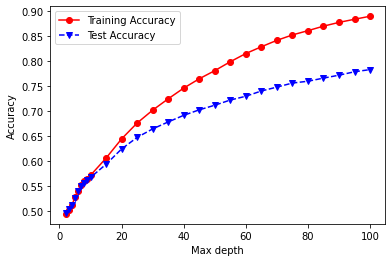

In [ ]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier

maxdepths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]
trainAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:
    clf = DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(X_train, Y_train)
    y_predTrain = clf.predict(X_train)
    y_predTest = clf.predict(X_test)
    trainAcc[index] = accuracy_score(Y_train, y_predTrain)
    testAcc[index] = accuracy_score(Y_test, y_predTest)
    print("Depth = ", depth, ", Training Accuracy = ", trainAcc[index], ", Test Accuracy = ", testAcc[index], 
          ", Diff = ", np.abs((trainAcc[index]-testAcc[index])*100), " %")
    index += 1

    

# Plot of training and test accuracies

    
plt.plot(maxdepths,trainAcc,'ro-',maxdepths,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy');

K =  1 , Training Accuracy =  0.9997775647171621  Test Accuracy =  0.4457875682640977 , Difference =  55.39899964530643 %
K =  5 , Training Accuracy =  0.4390412272291467  Test Accuracy =  0.40887893477327114 , Difference =  3.016229245587554 %
K =  10 , Training Accuracy =  0.39709300095877276  Test Accuracy =  0.3889979750874394 , Difference =  0.8095025871333372 %
K =  15 , Training Accuracy =  0.38479769894534993  Test Accuracy =  0.37927225869791986 , Difference =  0.5525440247430069 %
K =  20 , Training Accuracy =  0.37561649089165866  Test Accuracy =  0.3712032889488863 , Difference =  0.4413201942772338 %
K =  25 , Training Accuracy =  0.36995589645254073  Test Accuracy =  0.3664478124808247 , Difference =  0.3508083971716036 %
K =  30 , Training Accuracy =  0.3657372962607862  Test Accuracy =  0.36169233601276307 , Difference =  0.4044960248023144 %


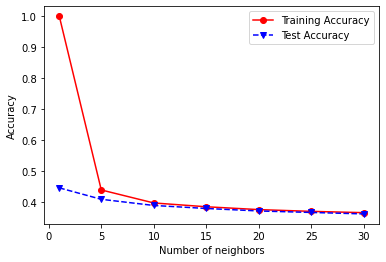

In [ ]:
# KNN with Euclidean Distance Metric

from sklearn.neighbors import KNeighborsClassifier
numNeighbors = [1, 5, 10, 15, 20, 25, 30]
trainAcc = []
testAcc = []

for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf.fit(X_train, Y_train)
    y_predTrain = clf.predict(X_train)
    y_predTest = clf.predict(X_test)
    trainAcc.append(accuracy_score(Y_train, y_predTrain))
    testAcc.append(accuracy_score(Y_test, y_predTest))

plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy');

index = 0
for i in numNeighbors:
    print("K = ", numNeighbors[index], ", Training Accuracy = ", trainAcc[index], " Test Accuracy = ", testAcc[index], 
          ", Difference = ", np.abs(trainAcc[index]-testAcc[index])*100, "%")
    index+=1

In [9]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics
clf = RandomForestClassifier(n_estimators = 200)  
clf.fit(X_train, Y_train)
y_pred_test = clf.predict(X_test)
y_pred_train = clf.predict(X_train)  
print()
print("TEST ACCURACY OF THE MODEL: ", metrics.accuracy_score(Y_test, y_pred_test))
print("TRAIN ACCURACY OF THE MODEL: ", metrics.accuracy_score(Y_train, y_pred_train))


TEST ACCURACY OF THE MODEL:  0.8370558998588697
TRAIN ACCURACY OF THE MODEL:  0.9998312559923298


In [ ]:
# Multinomial Naive Bayes

from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, Y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
print("Train Accuracy: ", accuracy_score(y_pred_train, Y_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, Y_test))

Train Accuracy:  0.7860709491850432
Test Accuracy:  0.7587899613425784
